In [1]:
# Importing nessassary libraries and Dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import sigmoid,relu,relu_backward,sigmoid_backward
data = pd.read_csv(r"Train_data1.csv", header=None)

# Initializing Weights and Biases

In [2]:
def initialize_parameters(linear_dims):
    dictt = {}
    for i in range(1, len(linear_dims)):
        dictt['W' + str(i)] = np.random.randn(linear_dims[i], linear_dims[i-1]) # Setting weights to a random number between 1 and 0
        dictt['b' + str(i)] = np.zeros((linear_dims[i], 1)) # Setting biases to zero
    return dictt

# Forward Propagation

In [3]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b # Forward pass equation
    cache = (A, W, b) # Cache for activation matrix, weights and biases
    return Z, cache

In [4]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, l_cache = linear_forward(A_prev, W, b) 
        act_f , ac_cache = sigmoid(Z) # Applying activation sigmoid function
        
    elif activation == "relu":
        Z, l_cache = linear_forward(A_prev, W, b)
        act_f , ac_cache = relu(Z) # Applying activation relu function
        
    cache = (l_cache, ac_cache) # Cache containing activation cache and linear cache 
    return act_f ,cache

In [5]:
def model_forward(X, parameters):
    caches = []
    A = X
    Layers = len(parameters) // 2 # Number of layers
        
    for i in range(1, Layers):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(i)], parameters['b' + str(i)], activation = "sigmoid")# A -> activation matrix of current layer, cache -> cache list of layer
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(Layers)], parameters['b' + str(Layers)], activation = "sigmoid") # AL -> activation matrix of last layer, cache -> cache list of layer
    caches.append(cache)
    
    return AL, caches

# Computing Cost

In [6]:
def compute_cost(AL, Y):
    c = np.multiply(np.log(AL),Y) +  np.multiply(np.log(1-AL), (1-Y)) # Cost formula
    print(AL.shape,Y.shape)
    cost = -np.mean(c, axis=1)[0] 
    
    return cost

# Backward Propagation 

In [7]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1] #97

    dW = 1./m*np.dot(dZ, A_prev.T) # The derivative of the current layer Weight matrix
    db = 1./m*np.sum(dZ, axis = 1, keepdims=True) # The derivative of current layer bias.
    dA_prev = np.dot(W.T, dZ) # The derivative of the previous layer Activation matrix
   
    
    return dA_prev, dW, db

In [8]:
def activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [9]:
def model_backward(AL, Y, caches):
    grads = {} # Dictionary containing all needed gradients
    L = len(caches) 
    Y = Y.values.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    curr_cache = caches[L-1] 
    
    # Calculating gradients for the last layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activation_backward(dAL, curr_cache, "sigmoid")
    
    # Calculating gradients for the hidden layers
    for l in reversed(range(L-1)):
        curr_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(grads["dA" + str(l + 1)], curr_cache, activation = "sigmoid")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Updating The Parameters

In [10]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters)//2 # Number of layers in NN
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)] # Updated weights
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)] # Updated biases 
    return parameters

# Network Driver Function

In [11]:
def model(X, Y, layers_dims, learning_rate, num_iterations):
    costs = []
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, caches = model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        costs.append(cost)
        print(cost)
        
    # Plotting the cost
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations')
    plt.show()
    
    return parameters

# Testing The Neural Network

C:\Users\Abdelrahman\utils.py:4: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
C:\Users\Abdelrahman\utils.py:23: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-Z))


(1, 97) (1, 97)
0.7191187141712608
(1, 97) (1, 97)
0.7186857437232799
(1, 97) (1, 97)
0.7182589282530808
(1, 97) (1, 97)
0.7178381821052605
(1, 97) (1, 97)
0.7174234207466531
(1, 97) (1, 97)
0.7170145607539881
(1, 97) (1, 97)
0.7166115198016033
(1, 97) (1, 97)
0.7162142166492355
(1, 97) (1, 97)
0.7158225711298538
(1, 97) (1, 97)
0.7154365041375657
(1, 97) (1, 97)
0.7150559376155983
(1, 97) (1, 97)
0.7146807945443392
(1, 97) (1, 97)
0.7143109989294496
(1, 97) (1, 97)
0.713946475790049
(1, 97) (1, 97)
0.7135871511469881
(1, 97) (1, 97)
0.7132329520111841
(1, 97) (1, 97)
0.7128838063720383
(1, 97) (1, 97)
0.7125396431859314
(1, 97) (1, 97)
0.712200392364818
(1, 97) (1, 97)
0.7118659847648715
(1, 97) (1, 97)
0.7115363521752369
(1, 97) (1, 97)
0.7112114273068735
(1, 97) (1, 97)
0.71089114378145
(1, 97) (1, 97)
0.7105754361203749
(1, 97) (1, 97)
0.7102642397338643
(1, 97) (1, 97)
0.7099574909101504
(1, 97) (1, 97)
0.709655126804728
(1, 97) (1, 97)
0.7093570854297334
(1, 97) (1, 97)
0.7090633

0.6892171083055035
(1, 97) (1, 97)
0.6892117197391019
(1, 97) (1, 97)
0.6892064076233603
(1, 97) (1, 97)
0.6892011708707935
(1, 97) (1, 97)
0.6891960084094438
(1, 97) (1, 97)
0.6891909191826499
(1, 97) (1, 97)
0.6891859021488355
(1, 97) (1, 97)
0.6891809562812904
(1, 97) (1, 97)
0.6891760805679583
(1, 97) (1, 97)
0.689171274011224
(1, 97) (1, 97)
0.6891665356277047
(1, 97) (1, 97)
0.6891618644480605
(1, 97) (1, 97)
0.6891572595167709
(1, 97) (1, 97)
0.6891527198919538
(1, 97) (1, 97)
0.6891482446451626
(1, 97) (1, 97)
0.6891438328611915
(1, 97) (1, 97)
0.6891394836378936
(1, 97) (1, 97)
0.6891351960859943
(1, 97) (1, 97)
0.6891309693288887
(1, 97) (1, 97)
0.6891268025024853
(1, 97) (1, 97)
0.6891226947550096
(1, 97) (1, 97)
0.6891186452468361
(1, 97) (1, 97)
0.6891146531503066
(1, 97) (1, 97)
0.6891107176495699
(1, 97) (1, 97)
0.6891068379404037
(1, 97) (1, 97)
0.6891030132300432
(1, 97) (1, 97)
0.6890992427370365
(1, 97) (1, 97)
0.6890955256910609
(1, 97) (1, 97)
0.6890918613327853
(1

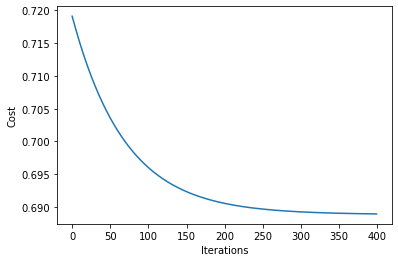

In [12]:
layers = [13,5,6,1]
X = data.iloc[0:97,1:14]
Y = data.iloc[0:97,0:1]
learning_rate = 0.01
num_iterations = 400
parameters = model(X.T, Y.T, layers, learning_rate, num_iterations)